In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fft, ifft

In [2]:
img = cv.imread("./SET-10/nucleiseg.png")
target = cv.imread("./SET-10/nucleiseg_mask.png")

In [4]:
b,g,r = [],[],[]
for i in img:
    x,y,z=[],[],[]
    for j in i:
        x.append(j[0])
        y.append(j[1])
        z.append(j[2])
    b.append(x)
    g.append(y)
    r.append(z)
b = np.asarray(b)
g = np.asarray(g)
r = np.asarray(r)

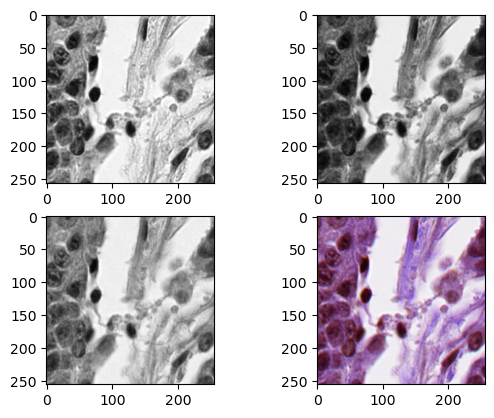

In [75]:
f, axs = plt.subplots(2,2)
axs[0,0].imshow(r, cmap="gray")
axs[0,1].imshow(g, cmap="gray")
axs[1,0].imshow(b, cmap="gray")
axs[1,1].imshow(img)

In [76]:
def convolve(img, kernel):
    fimg = fft2(img)
    fkernel = fft2(kernel, s=img.shape)
    out = ifft2(fimg * np.conj(fkernel))
    return np.real(out)

In [77]:
def log_transform(img):
    return np.log(img)*255/np.log(256)

In [78]:
def exp(img, pow):
    return (np.pow(img/255, pow) * 255).astype(np.uint8)

In [79]:
kernel = np.asarray([[1 for i in range(3)] for j in range(3)])
kernel = kernel/9
edge_kernel = np.asarray([[-1,0,1],[-1,0,1],[-1,0,1]])
sharpening_kernel = np.asarray([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [94]:
x = np.asarray([[255 if i<72 else 0 for i in j] for j in g])
y = np.asarray([[255 if i<100 else 0 for i in j] for j in r])
z = np.asarray([[255 if i<128 else 0 for i in j] for j in b])
f = (x+y+z)/(255*3)

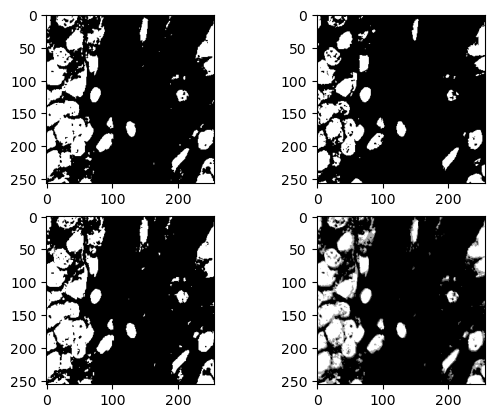

In [81]:
ef, axs = plt.subplots(2,2)
axs[0,0].imshow(x, cmap="gray")
axs[0,1].imshow(y, cmap="gray")
axs[1,0].imshow(z, cmap="gray")
axs[1,1].imshow(f, cmap="gray")

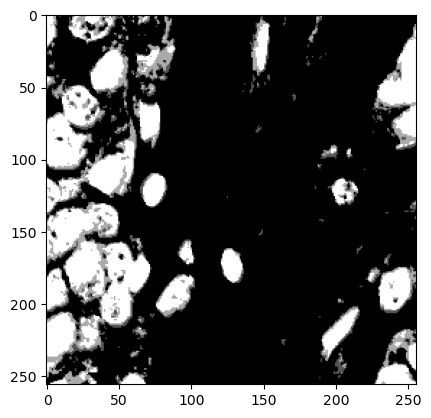

In [82]:
plt.imshow(f, cmap="gray")

In [64]:
k = np.ones((2,2))

In [ ]:
cv2.fillPoly(img_pl,pts=contours,color=(255,255,255))

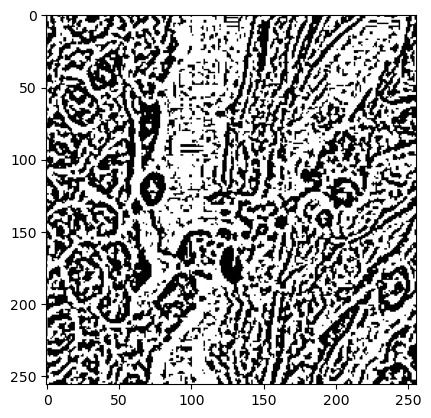

In [110]:
th3 = cv.adaptiveThreshold(r,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
plt.imshow(th3, cmap="gray")

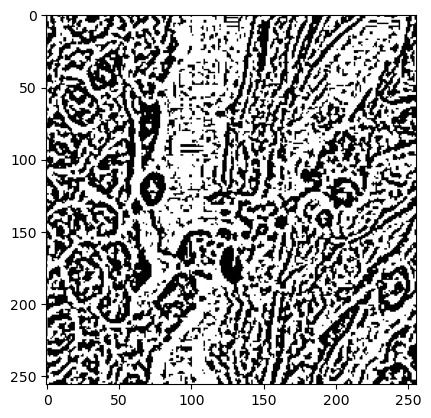

In [111]:
th2 = cv.adaptiveThreshold(r,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
plt.imshow(th3, cmap="gray")

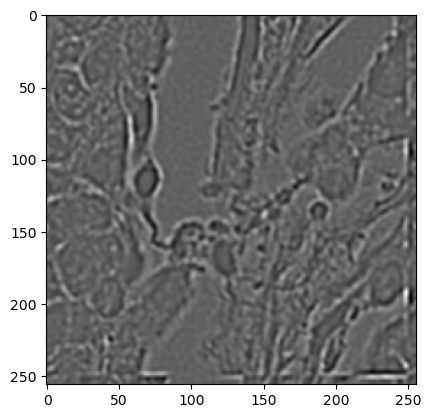

In [114]:
ed = convolve(r,np.asarray([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
plt.imshow(ed, cmap="gray")

In [ ]:
x = np.asarray([[255 if i<72 else 0 for i in j] for j in g])


In [96]:
k1 = cv.getStructuringElement(cv.MORPH_DILATE, (1,3))

In [97]:
k2 = cv.getStructuringElement(cv.MORPH_DILATE, (3,1))

In [104]:
x1 = np.asarray([[255 if i<60 and i>32 else 0 for i in j] for j in g])

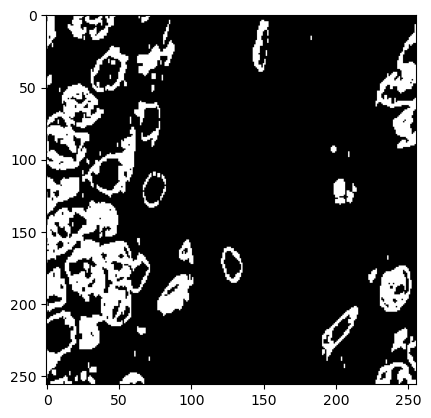

In [105]:
plt.imshow(cv.dilate(x1.astype(np.uint8),k1,iterations=1), cmap="grey")

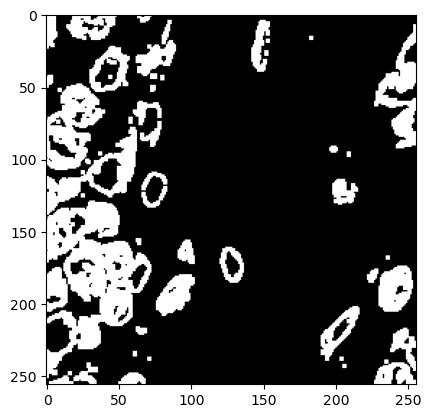

In [106]:
tmp = cv.dilate(x1.astype(np.uint8),k1,iterations=1)
plt.imshow(cv.dilate(tmp,k2,iterations=1), cmap="grey")

In [ ]:
plt.imshow(cv.dilate(x.astype(np.uint8),k1,iterations=2), cmap="grey")

In [ ]:
cv.fillPoly(cv.dilate(x.astype(np.uint8),k1,iterations=1), pts =[cv.dilate(x.astype(np.uint8),k1,iterations=1)], color=255)

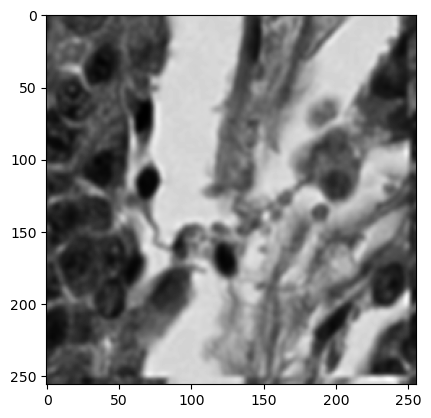

In [112]:
f = convolve(b, sharpening_kernel)
d = pow(f,2)
r = convolve(d,kernel)
r = convolve(r,kernel)
r = convolve(r,kernel)
r = convolve(r,kernel)

plt.imshow(r, cmap="gray")

In [113]:
blur = cv.GaussianBlur(g,(3,3),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [116]:
f = convolve(b, sharpening_kernel)
d = log_transform(f,2)
plt.imshow(d, cmap="gray")

TypeError: log_transform() takes 1 positional argument but 2 were given